In [37]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [38]:
file_path = 'drive/MyDrive/heart.csv'

In [39]:
df = pd.read_csv(file_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [41]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [42]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [43]:
df.shape

(1025, 14)

## columns information:

#### age:age
#### sex:sex
#### cp:chest pain type (4 values)
#### chol:resting blood pressure
#### fbs:serum cholestoral in mg/dl
####restceg:fasting blood sugar > 120 mg/dl
#### thalach:resting electrocardiographic results (values 0,1,2)
####exang:maximum heart rate achieved
#### oldpeak:exercise induced angina
#### slope:oldpeak = ST depression induced by exercise relative to rest
#### the slope of the peak exercise ST segment
#### ca:number of major vessels (0-3) colored by flourosopy
#### thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## Exploratory Data Analysis

In [44]:
# check for nmissing value values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
# chek if the datatype are in correct format
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

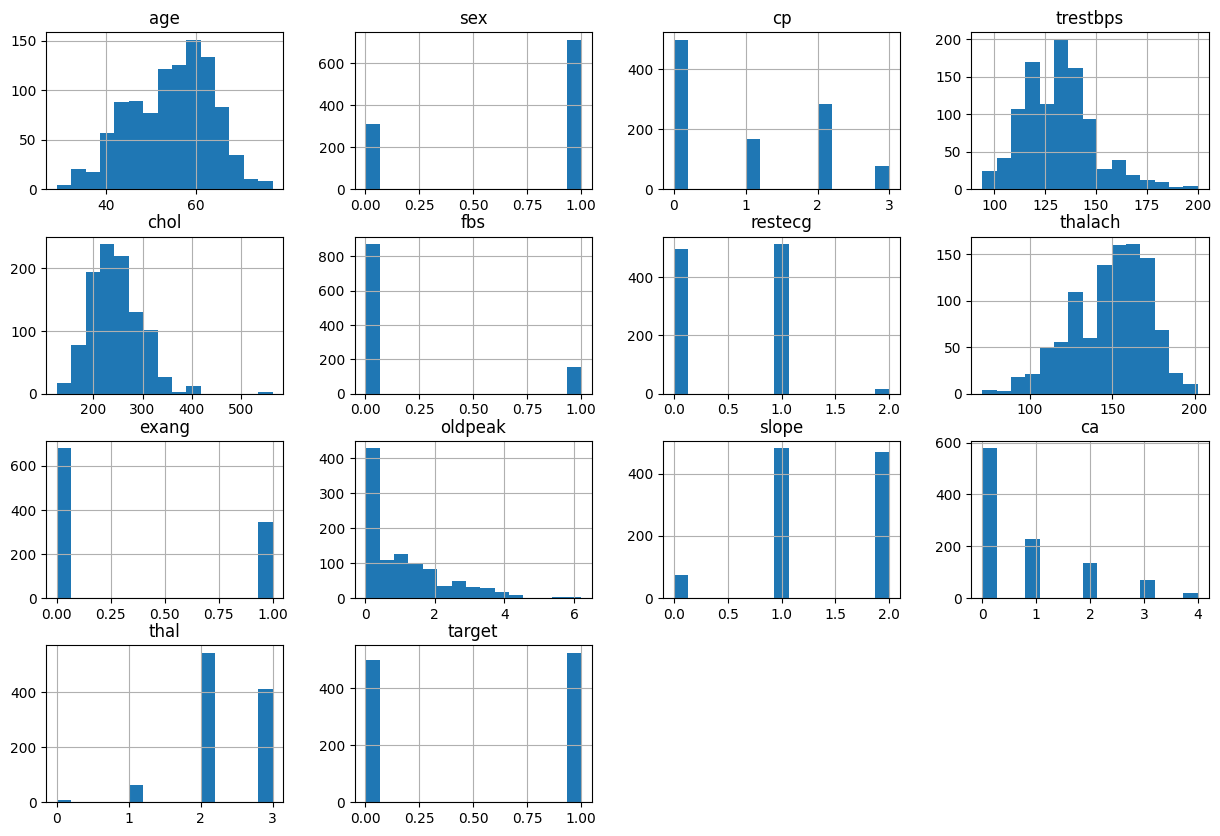

In [46]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

In [47]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

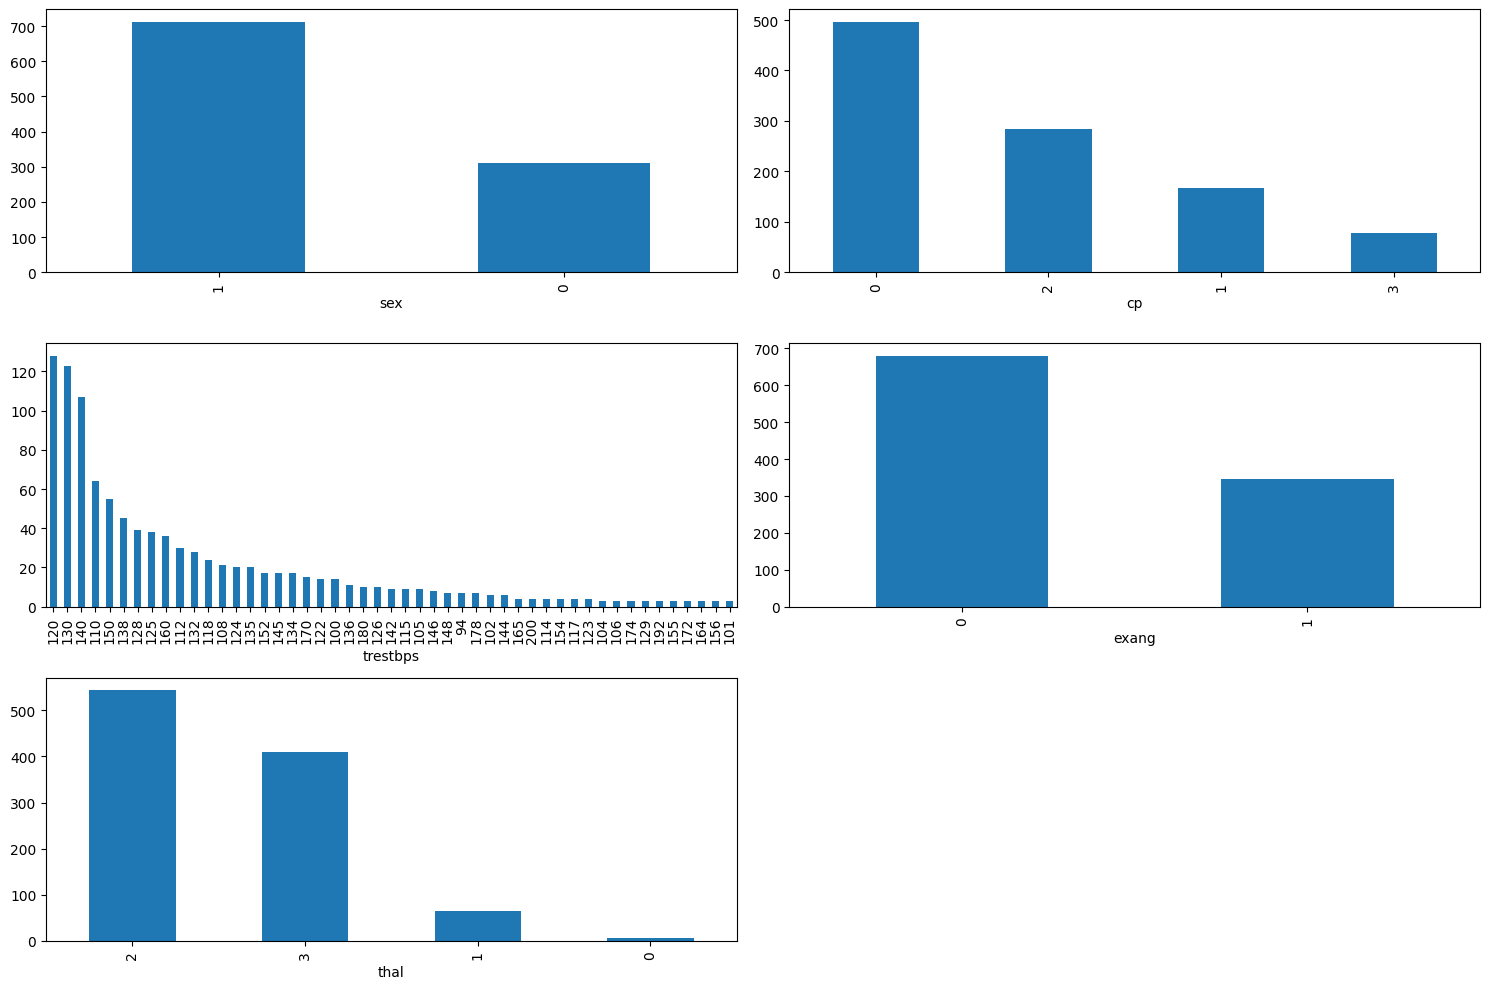

In [48]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
# Distribution of categorical features
ax = ax.flatten()
categorical_features = ['sex', 'cp', 'trestbps', 'exang', 'thal']
for index ,feature in enumerate(categorical_features):
    # sns.countplot(x=feature, data=df, ax=ax[index])
    df[feature].value_counts().plot(kind='bar' ,ax=ax[index])
    plt.title(feature)

ax[5].set_visible(False)
plt.tight_layout()
plt.show()

### Check for outlier

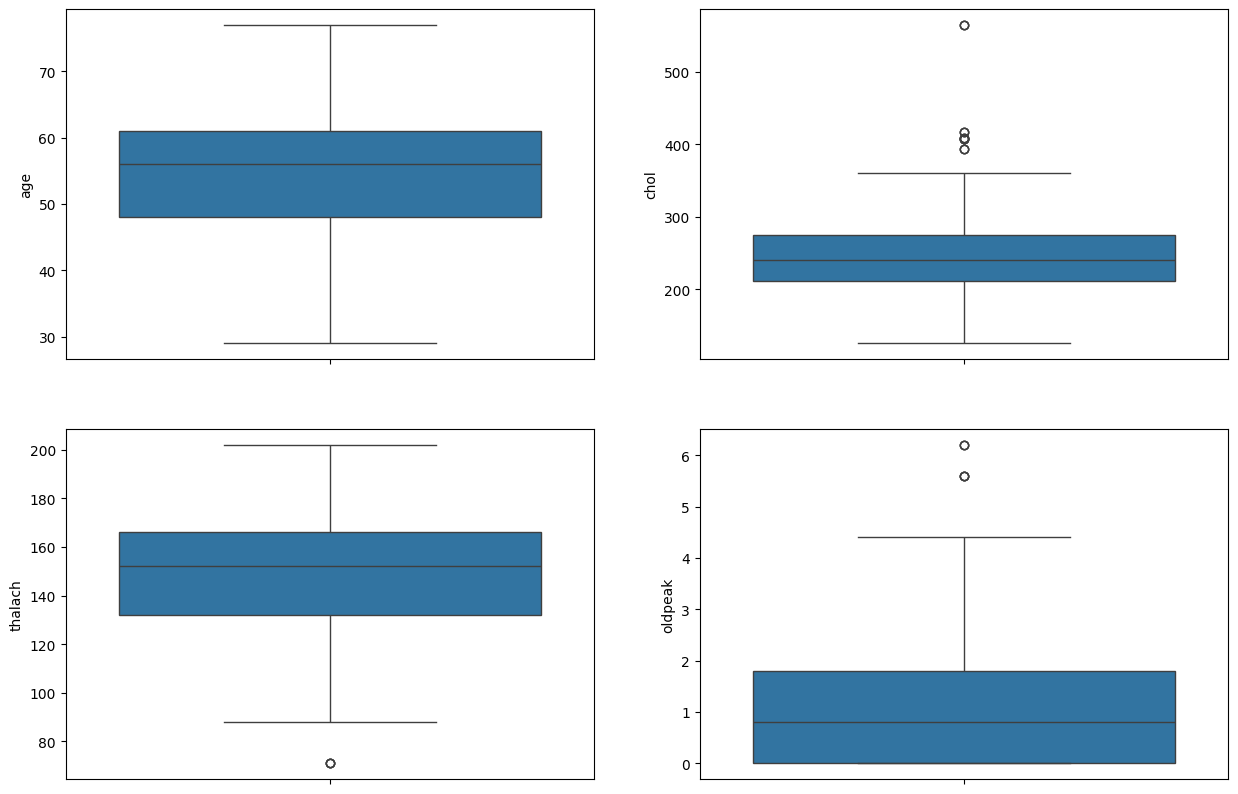

In [49]:
# prompt: next step

# Check for outliers in numerical features
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax = ax.flatten()
numerical_features = ['age', 'chol', 'thalach', 'oldpeak']
for index, feature in enumerate(numerical_features):
  sns.boxplot(df[feature], ax=ax[index])
  # ax[index].set_title(feature)
  # plt.title(feature)


## Model Training

In [50]:
x = df.drop('target', axis=1)
y = df['target']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2024,stratify=y)
print(len(x_train),len(x_test))

768 257


In [53]:
# prompt: create a feed forward neural network using tenorflow

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(13,)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model1.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))



Epoch 1/50
24/24 [==============================] - 2s 22ms/step - loss: 24.6525 - accuracy: 0.4909 - val_loss: 4.3294 - val_accuracy: 0.6226
Epoch 2/50
24/24 [==============================] - 0s 9ms/step - loss: 3.6502 - accuracy: 0.6406 - val_loss: 2.5634 - val_accuracy: 0.6848
Epoch 3/50
24/24 [==============================] - 0s 9ms/step - loss: 2.2259 - accuracy: 0.6927 - val_loss: 2.4409 - val_accuracy: 0.6887
Epoch 4/50
24/24 [==============================] - 0s 12ms/step - loss: 2.0544 - accuracy: 0.7083 - val_loss: 2.4189 - val_accuracy: 0.6537
Epoch 5/50
24/24 [==============================] - 0s 9ms/step - loss: 1.9608 - accuracy: 0.7096 - val_loss: 2.2059 - val_accuracy: 0.6848
Epoch 6/50
24/24 [==============================] - 0s 9ms/step - loss: 1.8817 - accuracy: 0.7083 - val_loss: 2.0676 - val_accuracy: 0.6965
Epoch 7/50
24/24 [==============================] - 0s 8ms/step - loss: 1.7468 - accuracy: 0.7122 - val_loss: 1.9187 - val_accuracy: 0.6926
Epoch 8/50
24/24 

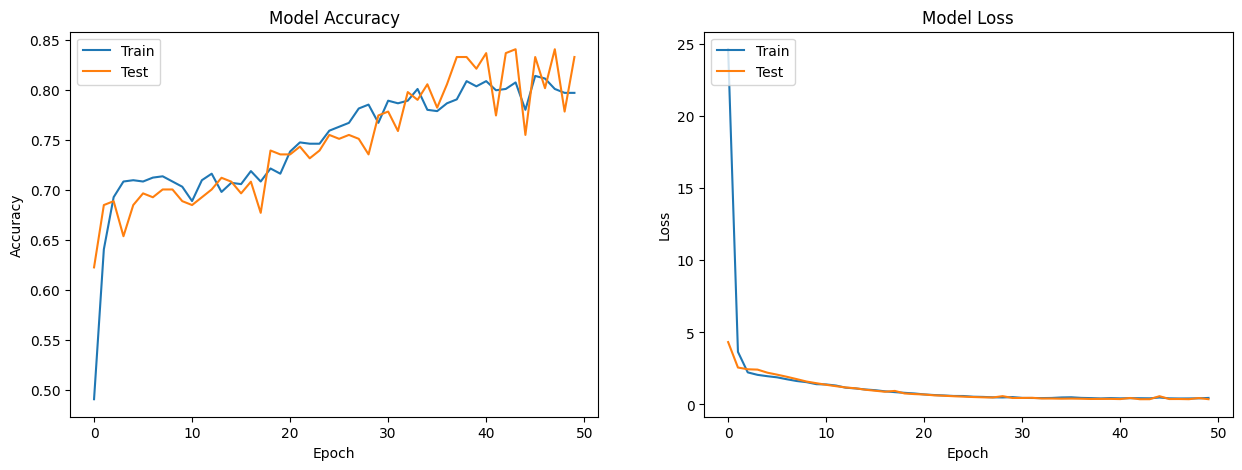

In [54]:
# prompt: plot the model


def plot_model(history):
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))

  # summarize history for accuracy
  ax[0].plot(history.history['accuracy'])
  ax[0].plot(history.history['val_accuracy'])
  ax[0].set_title('Model Accuracy')
  ax[0].set_ylabel('Accuracy')
  ax[0].set_xlabel('Epoch')
  ax[0].legend(['Train', 'Test'], loc='upper left')

  # summarize history for loss
  ax[1].plot(history.history['loss'])
  ax[1].plot(history.history['val_loss'])
  ax[1].set_title('Model Loss')
  ax[1].set_ylabel('Loss')
  ax[1].set_xlabel('Epoch')
  ax[1].legend(['Train', 'Test'], loc='upper left')

  plt.show()


plot_model(history)


In [55]:
# prompt: create a feed forward neural network using tenorflow

model2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(13,)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model2.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))



Epoch 1/100
24/24 [==============================] - 2s 19ms/step - loss: 5.4263 - accuracy: 0.5456 - val_loss: 2.2324 - val_accuracy: 0.5837
Epoch 2/100
24/24 [==============================] - 0s 10ms/step - loss: 1.3117 - accuracy: 0.6367 - val_loss: 1.2165 - val_accuracy: 0.6420
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 1.0845 - accuracy: 0.6589 - val_loss: 1.0814 - val_accuracy: 0.6187
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 1.0365 - accuracy: 0.6263 - val_loss: 1.0226 - val_accuracy: 0.6537
Epoch 5/100
24/24 [==============================] - 0s 10ms/step - loss: 0.9912 - accuracy: 0.6576 - val_loss: 0.9848 - val_accuracy: 0.6693
Epoch 6/100
24/24 [==============================] - 0s 10ms/step - loss: 0.9260 - accuracy: 0.6680 - val_loss: 1.0544 - val_accuracy: 0.6615
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 0.9195 - accuracy: 0.6758 - val_loss: 0.9085 - val_accuracy: 0.6848
Epoch 8/1

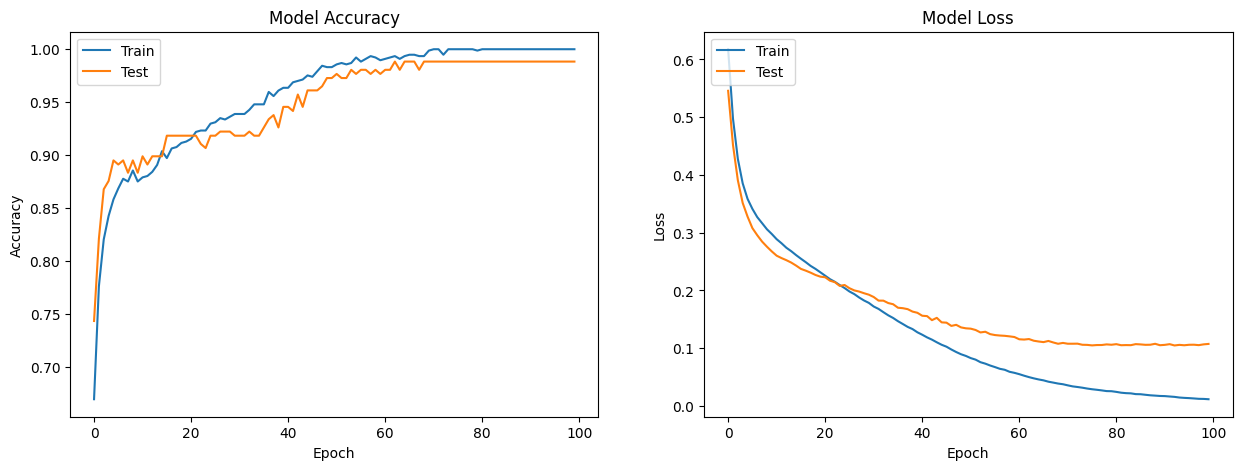

In [86]:
plot_model(history)

In [56]:
# prompt: create a feed forward neural network using tenorflow

model3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape=(13,)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model3.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))



Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 13.1639 - accuracy: 0.4896 - val_loss: 2.2334 - val_accuracy: 0.5136
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 1.5350 - accuracy: 0.5911 - val_loss: 0.6442 - val_accuracy: 0.6965
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7194 - accuracy: 0.6602 - val_loss: 0.6500 - val_accuracy: 0.6732
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6248 - accuracy: 0.7005 - val_loss: 0.5986 - val_accuracy: 0.7043
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 0.5738 - accuracy: 0.7018 - val_loss: 0.5754 - val_accuracy: 0.6965
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 0.5614 - accuracy: 0.7148 - val_loss: 0.5352 - val_accuracy: 0.7237
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 0.5344 - accuracy: 0.7344 - val_loss: 0.5088 - val_accuracy: 0.7315
Epoch 8/100

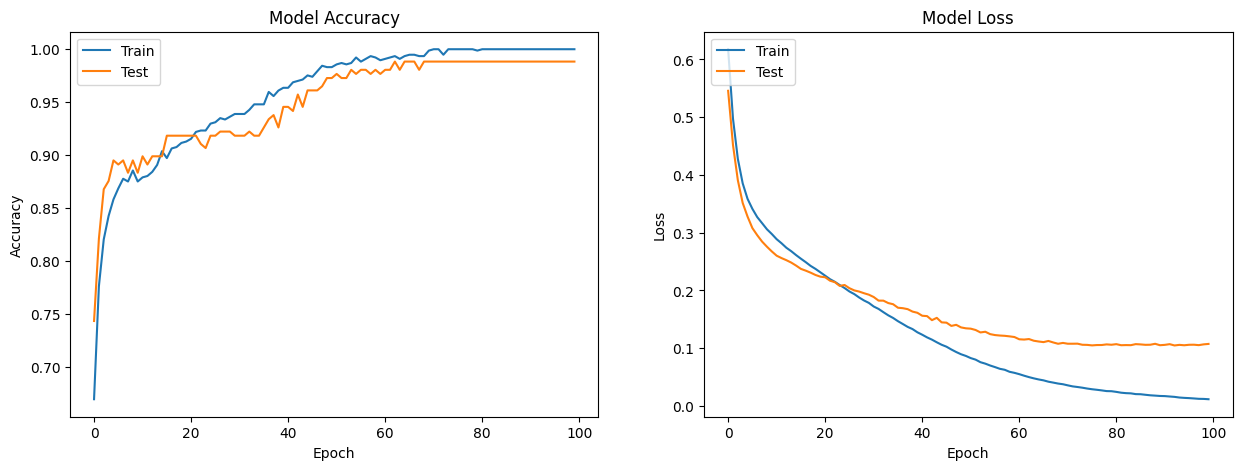

In [87]:
plot_model(history)

In [58]:
model1.evaluate(x_test,y_test)
model2.evaluate(x_test,y_test)
model3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 0.3198 - accuracy: 0.8521


[0.3198140859603882, 0.8521400690078735]

In [62]:
y_pred = model3.predict(x_test)

9/9 [==============================] - 0s 2ms/step


9/9 [==============================] - 0s 3ms/step
[[ 71  54]
 [103  29]]


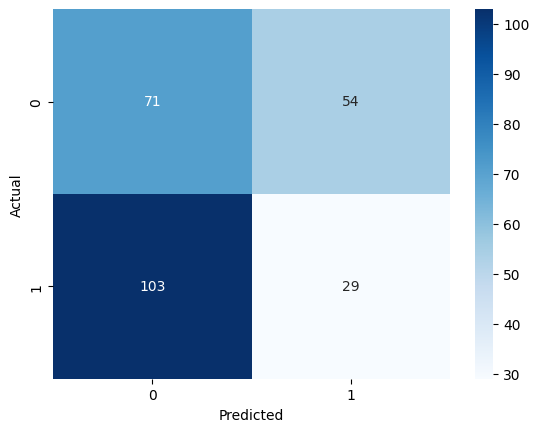

In [75]:
# prompt: import confusion matrix and compare


from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(model,x_test=x_test):
  y_pred = model.predict(x_test)

  y_pred_binary = [int(round(p[0])) for p in y_pred]

  # Create the confusion matrix
  cm = confusion_matrix(y_test, y_pred_binary)

  # Print the confusion matrix
  print(cm)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

plot_confusion_matrix(model3)


## Scaling The Dataset

In [65]:
# prompt: scale the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [67]:
# prompt: create a feed forward neural network using tenorflow

model4 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape=(13,)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model4.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_test_scaled, y_test))



Epoch 1/100
24/24 [==============================] - 2s 15ms/step - loss: 0.6177 - accuracy: 0.6693 - val_loss: 0.5457 - val_accuracy: 0.7432
Epoch 2/100
24/24 [==============================] - 0s 8ms/step - loss: 0.4975 - accuracy: 0.7760 - val_loss: 0.4519 - val_accuracy: 0.8210
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4278 - accuracy: 0.8203 - val_loss: 0.3908 - val_accuracy: 0.8677
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 0.3854 - accuracy: 0.8424 - val_loss: 0.3515 - val_accuracy: 0.8755
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 0.3586 - accuracy: 0.8581 - val_loss: 0.3279 - val_accuracy: 0.8949
Epoch 6/100
24/24 [==============================] - 0s 8ms/step - loss: 0.3412 - accuracy: 0.8685 - val_loss: 0.3079 - val_accuracy: 0.8911
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 0.3270 - accuracy: 0.8776 - val_loss: 0.2956 - val_accuracy: 0.8949
Epoch 8/100


## Model 4 performs bettwe after scaling the dataset

9/9 [==============================] - 0s 4ms/step
[[ 89  36]
 [  7 125]]


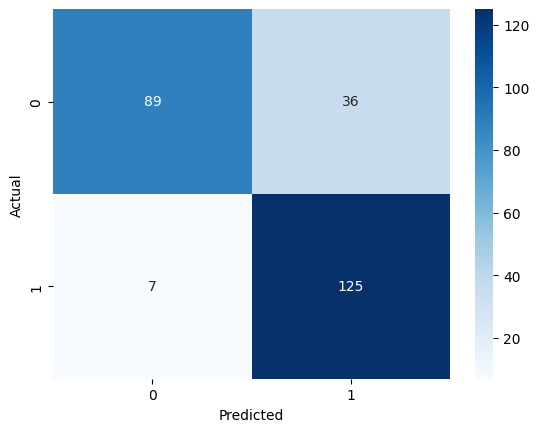

In [71]:
plot_confusion_matrix(model1)

In [73]:
y_test.value_counts()

target
1    132
0    125
Name: count, dtype: int64

9/9 [==============================] - 0s 4ms/step
[[125   0]
 [  3 129]]


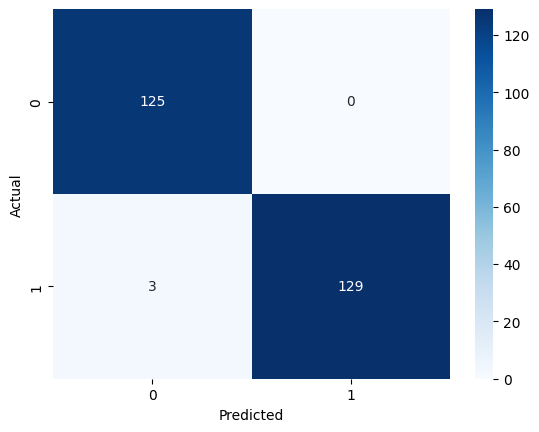

In [76]:
plot_confusion_matrix(model4,x_test_scaled)

In [83]:
model1_score = model1.evaluate(x_test,y_test)[1]
model2_score = model2.evaluate(x_test,y_test)[1]
model3_score =model3.evaluate(x_test,y_test)[1]
model4_score =model4.evaluate(x_test_scaled,y_test)[1]

9/9 [==============================] - 0s 3ms/step - loss: 0.1073 - accuracy: 0.9883


In [84]:
model1_score

0.8326848149299622

In [85]:
model_result = pd.DataFrame({"model":["model_1","model_2","model_3","model_4"],"score":[model1_score,model2_score,model3_score,model4_score]  } )
model_result

,model,score
0,model_1,0.832685
1,model_2,0.848249
2,model_3,0.389105
3,model_4,0.988327
